In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.close("all")

In [2]:
print("from path: {}".format(os.getcwd()))
os.chdir("../NewDATABGLNCS")
print("moved to path: {}".format(os.getcwd()))

from path: /mnt/PartPhy/CodeBGLNCS
moved to path: /mnt/PartPhy/NewDATABGLNCS


In [3]:
columns =['i','j','Lambda1','Lambda2','Lambda3','Lambda4','Lambda1Dash','Lambda2Dash','Lambda3Dash','Mu3','Mub','alpha1','alpha2','alpha3','alpha4',\
    'Y1d11','Y1d12','Y1d13','Y1d21','Y1d22','Y1d23','Y2d31','Y2d32','Y2d33','Y1u11','Y1u12','Y1u21','Y1u22','Y2u33','Y1e11','Y1e12','Y1e22','Y1e33',\
    'Y1n11','Y1n12','Y1n22','Y1n33','B11','B12','B21','B22','C13','C23','C31','C32',\
    'imY1d11','imY1d12','imY1d13','imY1d21','imY1d22','imY1d23','imY2d31','imY2d32','imY2d33','imY1u11','imY1u12','imY1u21','imY1u22','imY1e11','imY1e12','imY1e21','imY1e22',\
    'V1','V2','VS','Mhh1','Mhh2','Mhh3','MAh2','MAh3','MHm2','MFv1','MFv2','MFv3','MFv4','MFv5','MFv6',\
    'T_parameter','S_parameter','U_parameter','BRhh2toAh2Ah2']
columns2 = ['HiggsBounds_pass','HBresult','chanel','obsratio','ncomb','HiggsSignal_pass','Pvalue','nobs_tot','nobs_h','nobs_mu','csq_tot','csq_mh','csq_mu']
columns3= ['RatioBXsgamma','RatioB0ee','RatioBsee','RatioB0mumu','RatioBsmumu','RatioB0tautau',\
    'RatioBstautau','RatioDeltaMd','RatioDeltaMs','RatioRBpmue','RatioRB0mue',\
    'Ratioeps_K','RatioBpKnunu','RatioBppinunu','RatioB0pinunu','RatioB0Knunu',\
    'RatioBRBXsll','RatioBpmunu','RatioBptaunu','RatioBpDlnu','RatioDpmunu','RatioDptaunu',\
    'RatioKLmumu','RatioKLee','RatioKppinunu','RatioKLpinunu','Ratioepsp_over_eps','RatioRmueB0Kll',\
    'RatioRmueBpKll']
columns4 = ['beta','a2','a3','delta','gamma1']
columns5 = ['X(gg->h1)','Xd(gg->h1)','X(gg->h2)','Xd(gg->h2)','X(gg->h3)','Xd(gg->h3)','X(gg->d3bard3ah2)',\
            'Xd(gg->d3bard3ah2)','X(gg->d3bard3ah3)','Xd(gg->d3bard3ah3)','X(gg->d3bard3h1)','Xd(gg->d3bard3h1)',\
            'X(gg->d3bard3h2)','Xd(gg->d3bard3h2)','X(gg->d3bard3h3)','Xd(gg->d3bard3h3)']
columnsNew = columns + columns2 + columns3 + columns4 + columns5 

## Load data

In [4]:
df = pd.read_csv('dfB1T1.txt',header = None, delimiter = ",",names=columnsNew)

In [5]:
#EW1df = pd.read_csv('EW1T50data.txt',header = None, delimiter = ",",names=columnsNew)
#D1df = pd.read_csv('D1T50data.txt',header = None, delimiter = ",",names=columns)

In [6]:
print('number of events {}'.format(df.shape[0]))

number of events 23


## Filter one,pass STU (ps1)

In [7]:
def EW_precision_function1(T_parameter,S_parameter,U_parameter):

    EW_T,EW_S,EW_U = float(T_parameter),float(S_parameter),float(U_parameter)

    InvSig = [[1720.26, -1288.92, 1027.36],[-1288.92,1142.91, -639.825],[1027.36, -639.825, 832.293]]
    Obsref = [0.07, 0.02, 0.00]
    delta_chi = "%10.8F" % ((EW_T-Obsref[0])*InvSig[0][0]*(EW_T-Obsref[0]) +
                              (EW_S-Obsref[1])*InvSig[1][0]*(EW_T-Obsref[0]) +
                              (EW_U-Obsref[2])*InvSig[2][0]*(EW_T-Obsref[0]) +
                              (EW_T-Obsref[0])*InvSig[0][1]*(EW_S-Obsref[1]) +
                              (EW_S-Obsref[1])*InvSig[1][1]*(EW_S-Obsref[1]) +
                              (EW_U-Obsref[2])*InvSig[2][1]*(EW_S-Obsref[1]) +
                              (EW_T-Obsref[0])*InvSig[0][2]*(EW_U-Obsref[2]) +
                              (EW_S-Obsref[1])*InvSig[1][2]*(EW_U-Obsref[2]) +
                              (EW_U-Obsref[2])*InvSig[2][2]*(EW_U-Obsref[2]))
    if float(delta_chi) < 7.815:
        EW_precision = True
    if float(delta_chi) > 7.815:
        EW_precision = False
    return EW_precision
def EW_precision_function2(T_parameter,S_parameter,U_parameter):

    EW_T,EW_S,EW_U = float(T_parameter),float(S_parameter),float(U_parameter)

    InvSig = [[1720.26, -1288.92, 1027.36],[-1288.92,1142.91, -639.825],[1027.36, -639.825, 832.293]]
    Obsref = [0.07, 0.02, 0.00]
    delta_chi = "%10.8F" % ((EW_T-Obsref[0])*InvSig[0][0]*(EW_T-Obsref[0]) +
                              (EW_S-Obsref[1])*InvSig[1][0]*(EW_T-Obsref[0]) +
                              (EW_U-Obsref[2])*InvSig[2][0]*(EW_T-Obsref[0]) +
                              (EW_T-Obsref[0])*InvSig[0][1]*(EW_S-Obsref[1]) +
                              (EW_S-Obsref[1])*InvSig[1][1]*(EW_S-Obsref[1]) +
                              (EW_U-Obsref[2])*InvSig[2][1]*(EW_S-Obsref[1]) +
                              (EW_T-Obsref[0])*InvSig[0][2]*(EW_U-Obsref[2]) +
                              (EW_S-Obsref[1])*InvSig[1][2]*(EW_U-Obsref[2]) +
                              (EW_U-Obsref[2])*InvSig[2][2]*(EW_U-Obsref[2]))
    return delta_chi


In [8]:
df['STU'] = df.apply(lambda row: EW_precision_function1(row.T_parameter,row.S_parameter,row.U_parameter,), axis = 1)
df['STU_chi'] = df.apply(lambda row: EW_precision_function2(row.T_parameter,row.S_parameter,row.U_parameter,), axis = 1)

In [14]:
df_ps1 =  df[df['STU'] == True  ]
print("number of points pass STU:",df_ps1.shape[0])

number of points pass STU: 4


In [22]:
#df_ps1

In [23]:
#df.tail(5)

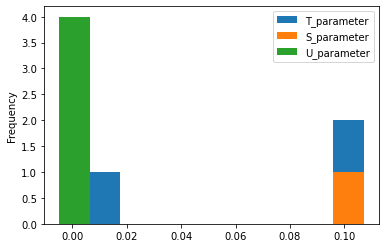

In [20]:
df_ps1[['T_parameter','S_parameter','U_parameter']].plot.hist();

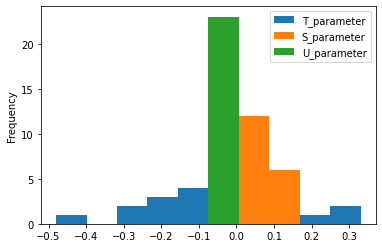

In [21]:
df[['T_parameter','S_parameter','U_parameter']].plot.hist();

## Filter two, pass higgsbounds (ps2)

In [28]:
df_ps1ps2 = df_ps1[df_ps1['HiggsBounds_pass'] ==True]

In [29]:
print("number of points pass STU and HiggsBounds: {}".format(df_ps1ps2.shape[0]))

number of points pass STU and HiggsBounds: 1


## Filter three, pass higgssignal (ps3)

In [32]:
df_ps1ps2ps3 =  df_ps1ps2[df_ps1ps2['Pvalue'] >= 0.05  ]
print("number of points pass EWPT and HS:{}".format(df_ps1ps2ps3.shape[0]))

number of points pass EWPT and HS:0


# testing HS data and depemdas on couplings

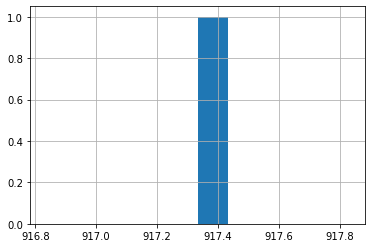

In [33]:
df_ps1ps2["csq_tot"].hist();

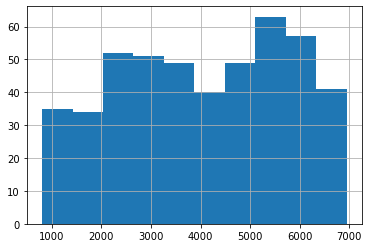

In [22]:
df_ps1ps2ps3['VS'].hist();

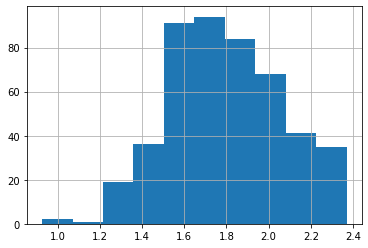

In [23]:
df_ps1ps2ps3['delta'].hist();

In [28]:
#test.insert(2,"sinD", np.sin(test['delta']), True)

In [29]:
#test.insert(2,"sina2", np.sin(test['a2']), True)

In [30]:
#test.insert(2,"sina2-b", np.sin(test['a2']-test['beta']), True)

In [31]:
#test.shape

(6432, 131)

In [34]:
#test2=test[test["Pvalue"]>= 0.05]
#test2[["Pvalue","sinD","sina2-b","sina2","beta","gamma1"]]

leave a2 free fig gamma1 around pi/2

I need to test the allowed values of a2

In [36]:
print("total number of points : {} number of points pass STU, HB, HS : {}".format(df.shape[0],df_ps1ps2ps3.shape[0]))

total number of points : 23 number of points pass STU, HB, HS : 0


## PLots with EWPT, HB and HS

In [37]:

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches

from matplotlib.ticker import AutoMinorLocator
from matplotlib.pyplot import xlabel
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size

import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D



In [38]:
#set plot colors
color1 = "orange"
color2 = "red"
color3 = "green"
ss = 4

## Attempt one for STU plots

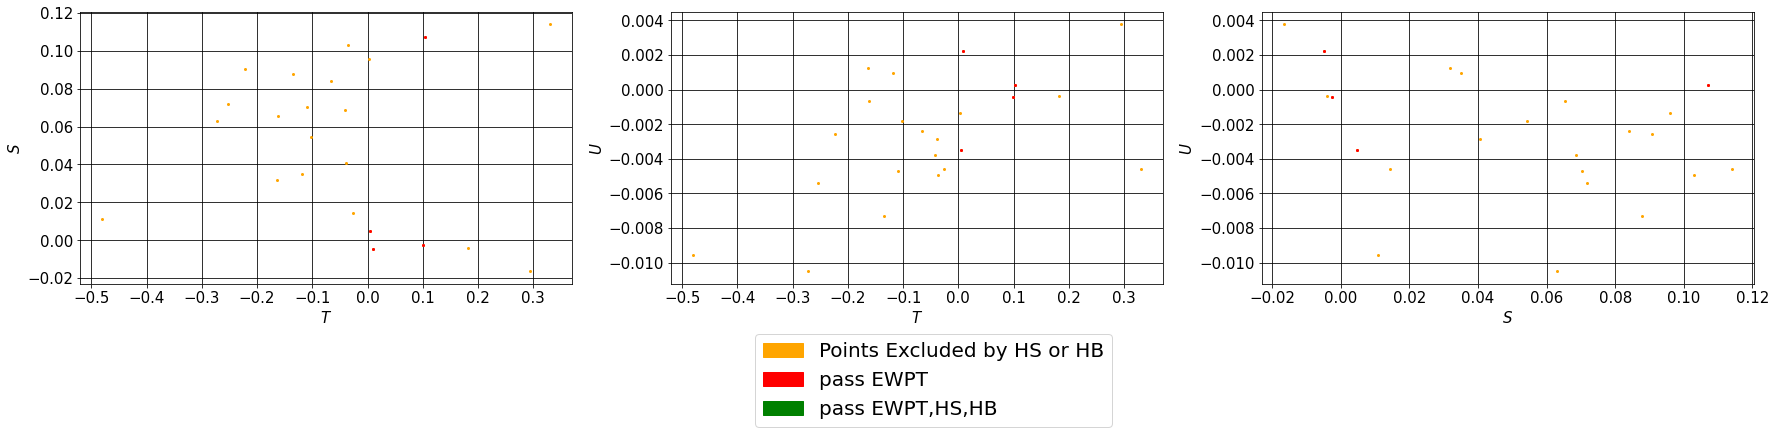

In [39]:
fig = plt.figure(figsize=(30,5))

#fig.set_figheight(1)
#fig.set_figwidth(60)

# Adds subplot on position 1
ax1 = fig.add_subplot(131)

# Adds subplot on position 2
ax2 = fig.add_subplot(132)

# Adds subplot on position 2
ax3 = fig.add_subplot(133)

df.plot(kind='scatter',x="T_parameter", y="S_parameter",color=color1 ,s=ss,label=r'Points Excluded by HS or HB',ax=ax1,legend=False);
df_ps1.plot(kind='scatter',x="T_parameter", y="S_parameter", color=color2,s=ss,label="pass EWPT", ax=ax1,legend=False);
df_ps1ps2ps3.plot(kind='scatter',x="T_parameter", y="S_parameter",color=color3,s=ss,label="pass EWPT,HS,HB", ax=ax1,legend=False);

df.plot(kind='scatter',x="T_parameter", y="U_parameter",color=color1 ,s=ss,label=r'Points Excluded by HS or HB',ax=ax2,legend=False);
df_ps1.plot(kind='scatter',x="T_parameter", y="U_parameter", color=color2,s=ss,label="pass EWPT", ax=ax2,legend=False);
df_ps1ps2ps3.plot(kind='scatter',x="T_parameter", y="U_parameter",color=color3,s=ss,label="pass EWPT,HS,HB", ax=ax2,legend=False);

df.plot(kind='scatter',x="S_parameter", y="U_parameter",color=color1 ,s=ss,label=r'Points Excluded by HS or HB',ax=ax3,legend=False);
df_ps1.plot(kind='scatter',x="S_parameter", y="U_parameter", color=color2,s=ss,label="pass EWPT",ax=ax3,legend=False);
df_ps1ps2ps3.plot(kind='scatter',x="S_parameter", y="U_parameter",color=color3,s=ss,label="pass EWPT,HS,HB",ax=ax3,legend=False);

ax1.set_axisbelow(True)
ax1.grid(True,which='major',ls='-',c='black')
ax1.grid(True,which='minor',ls='--',c='grey')

ax2.set_axisbelow(True)
ax2.grid(True,which='major',ls='-',c='black')
ax2.grid(True,which='minor',ls='--',c='grey')

ax3.set_axisbelow(True)
ax3.grid(True,which='major',ls='-',c='black')
ax3.grid(True,which='minor',ls='--',c='grey')

#fig.legend(loc='lower center', bbox_to_anchor=(0.52, -0.35),fontsize = 15 )
#ax.set_xlim(120,500)
#ax.set_ylim(120,500)
ax1.set_xlabel(r'$T$', fontsize=15)
ax1.set_ylabel(r'$S$', fontsize=15)
ax2.set_xlabel(r'$T$', fontsize=15)
ax2.set_ylabel(r'$U$', fontsize=15)
ax3.set_xlabel(r'$S$', fontsize=15)
ax3.set_ylabel(r'$U$', fontsize=15)

ax1.tick_params(labelsize=15) ;
ax2.tick_params(labelsize=15) ;
ax3.tick_params(labelsize=15) ;

handles, labels = plt.gca().get_legend_handles_labels()

patch = mpatches.Patch(color=color1 ,label=r'Points Excluded by HS or HB')  
patch1 = mpatches.Patch(color=color2,label="pass EWPT")
patch2= mpatches.Patch(color=color3,label="pass EWPT,HS,HB")
#line = Line2D([], [],marker= "o", label = 'manual line',color='blue')

handles.extend([patch,patch1,patch2])

fig.legend(loc='lower center', bbox_to_anchor=(0.52, -0.3),fontsize = 20 ,handles=handles)

plt.show();
#ax = Ddf.plot.scatter(x="Mhh2", y="Mhh3", color=color1,s=ss ,label="fail EWPT",logx=True,logy= True);
#ax.grid(True,which='major',ls='-',c='black')
#ax.grid(True,which='minor',ls='--',c='grey')

## Attempt two for STU plots

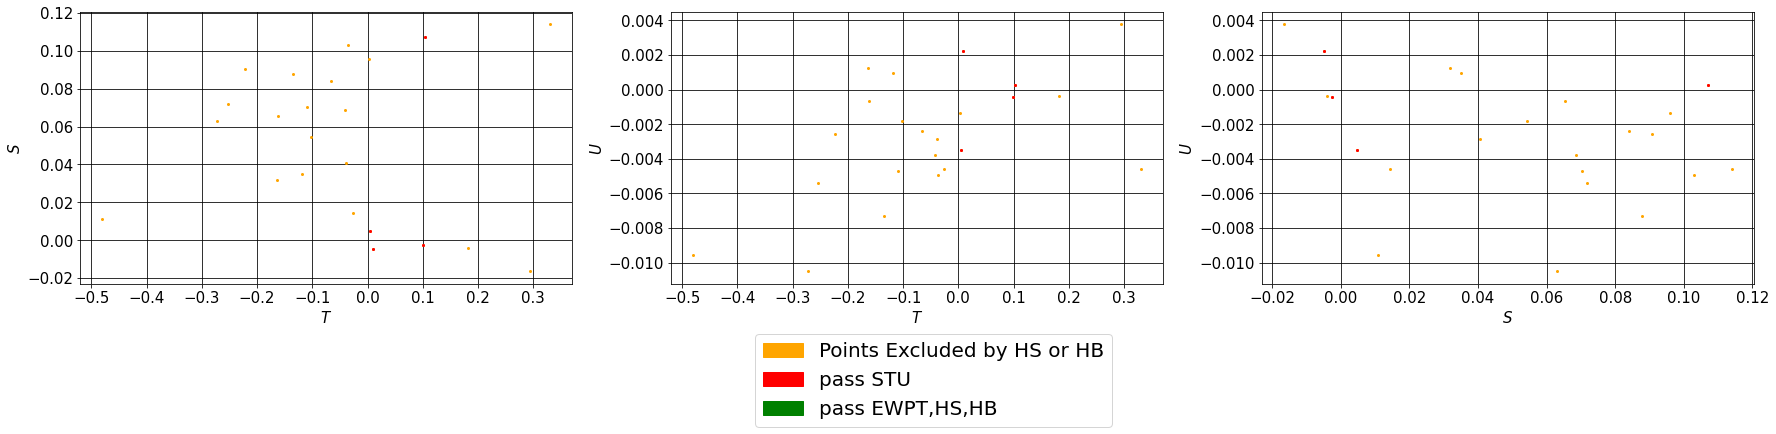

In [40]:
fig = plt.figure(figsize=(30,5))

#fig.set_figheight(1)
#fig.set_figwidth(60)

# Adds subplot on position 1
ax1 = fig.add_subplot(131)

# Adds subplot on position 2
ax2 = fig.add_subplot(132)

# Adds subplot on position 2
ax3 = fig.add_subplot(133)

df.plot(kind='scatter',x="T_parameter", y="S_parameter",color=color1 ,s=ss,label=r'Points Excluded by HS or HB',ax=ax1,legend=False);
df_ps1.plot(kind='scatter',x="T_parameter", y="S_parameter", color=color2,s=ss,label="pass EWPT", ax=ax1,legend=False);
#EWpHBpHSdf.plot(kind='scatter',x="T_parameter", y="S_parameter",color=color3,s=ss,label="pass EWPT,HS,HB", ax=ax1,legend=False);

df.plot(kind='scatter',x="T_parameter", y="U_parameter",color=color1 ,s=ss,label=r'Points Excluded by HS or HB',ax=ax2,legend=False);
df_ps1.plot(kind='scatter',x="T_parameter", y="U_parameter", color=color2,s=ss,label="pass EWPT", ax=ax2,legend=False);
#EWpHBpHSdf.plot(kind='scatter',x="T_parameter", y="U_parameter",color=color3,s=ss,label="pass EWPT,HS,HB", ax=ax2,legend=False);

df.plot(kind='scatter',x="S_parameter", y="U_parameter",color=color1 ,s=ss,label=r'Points Excluded by HS or HB',ax=ax3,legend=False);
df_ps1.plot(kind='scatter',x="S_parameter", y="U_parameter", color=color2,s=ss,label="pass EWPT",ax=ax3,legend=False);
#EWpHBpHSdf.plot(kind='scatter',x="S_parameter", y="U_parameter",color=color3,s=ss,label="pass EWPT,HS,HB",ax=ax3,legend=False);

ax1.set_axisbelow(True)
ax1.grid(True,which='major',ls='-',c='black')
ax1.grid(True,which='minor',ls='--',c='grey')

ax2.set_axisbelow(True)
ax2.grid(True,which='major',ls='-',c='black')
ax2.grid(True,which='minor',ls='--',c='grey')

ax3.set_axisbelow(True)
ax3.grid(True,which='major',ls='-',c='black')
ax3.grid(True,which='minor',ls='--',c='grey')

#fig.legend(loc='lower center', bbox_to_anchor=(0.52, -0.35),fontsize = 15 )
#ax.set_xlim(120,500)
#ax.set_ylim(120,500)
ax1.set_xlabel(r'$T$', fontsize=15)
ax1.set_ylabel(r'$S$', fontsize=15)
ax2.set_xlabel(r'$T$', fontsize=15)
ax2.set_ylabel(r'$U$', fontsize=15)
ax3.set_xlabel(r'$S$', fontsize=15)
ax3.set_ylabel(r'$U$', fontsize=15)

ax1.tick_params(labelsize=15) ;
ax2.tick_params(labelsize=15) ;
ax3.tick_params(labelsize=15) ;

handles, labels = plt.gca().get_legend_handles_labels()

patch = mpatches.Patch(color=color1 ,label=r'Points Excluded by HS or HB')  
patch1 = mpatches.Patch(color=color2,label="pass STU")
#patch2= mpatches.Patch(color=color3,label="pass EWPT,HS,HB")
#line = Line2D([], [],marker= "o", label = 'manual line',color='blue')

handles.extend([patch,patch1,patch2])

fig.legend(loc='lower center', bbox_to_anchor=(0.52, -0.3),fontsize = 20 ,handles=handles)

plt.show();
#ax = Ddf.plot.scatter(x="Mhh2", y="Mhh3", color=color1,s=ss ,label="fail EWPT",logx=True,logy= True);
#ax.grid(True,which='major',ls='-',c='black')
#ax.grid(True,which='minor',ls='--',c='grey')

test plot for stu

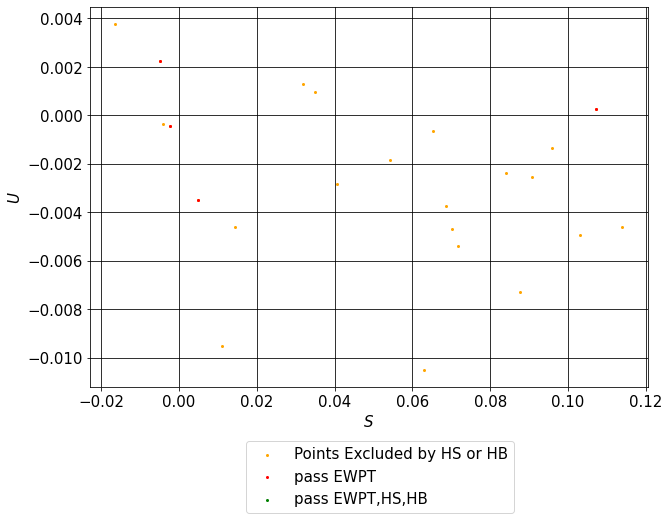

In [43]:

ax = df.plot(kind='scatter',x="S_parameter", y="U_parameter",color=color1 ,s=ss,label=r'Points Excluded by HS or HB',figsize=(10, 7));
df_ps1.plot(kind='scatter',x="S_parameter", y="U_parameter", color=color2,s=ss,label="pass EWPT",figsize=(10, 7), ax=ax);
df_ps1ps2ps3.plot(kind='scatter',x="S_parameter", y="U_parameter",color=color3,s=ss,label="pass EWPT,HS,HB",figsize=(10, 7), ax=ax);
#ax.set_yscale('log')
#ax.set_xscale('log')

ax.set_axisbelow(True)

ax.grid(True,which='major',ls='-',c='black')
ax.grid(True,which='minor',ls='--',c='grey')
#ax.set_xlim(120,500)
#ax.set_ylim(120,500)
ax.set_xlabel(r'$S$', fontsize=15)
ax.set_ylabel(r'$U$', fontsize=15)
ax.tick_params(labelsize=15) ;
ax.legend(loc='lower center', bbox_to_anchor=(0.52, -0.35),fontsize = 15 )
plt.show();
#ax = Ddf.plot.scatter(x="Mhh2", y="Mhh3", color=color1,s=ss ,label="fail EWPT",logx=True,logy= True);
#ax.grid(True,which='major',ls='-',c='black')
#ax.grid(True,which='minor',ls='--',c='grey')

## Attempt one for mass plots

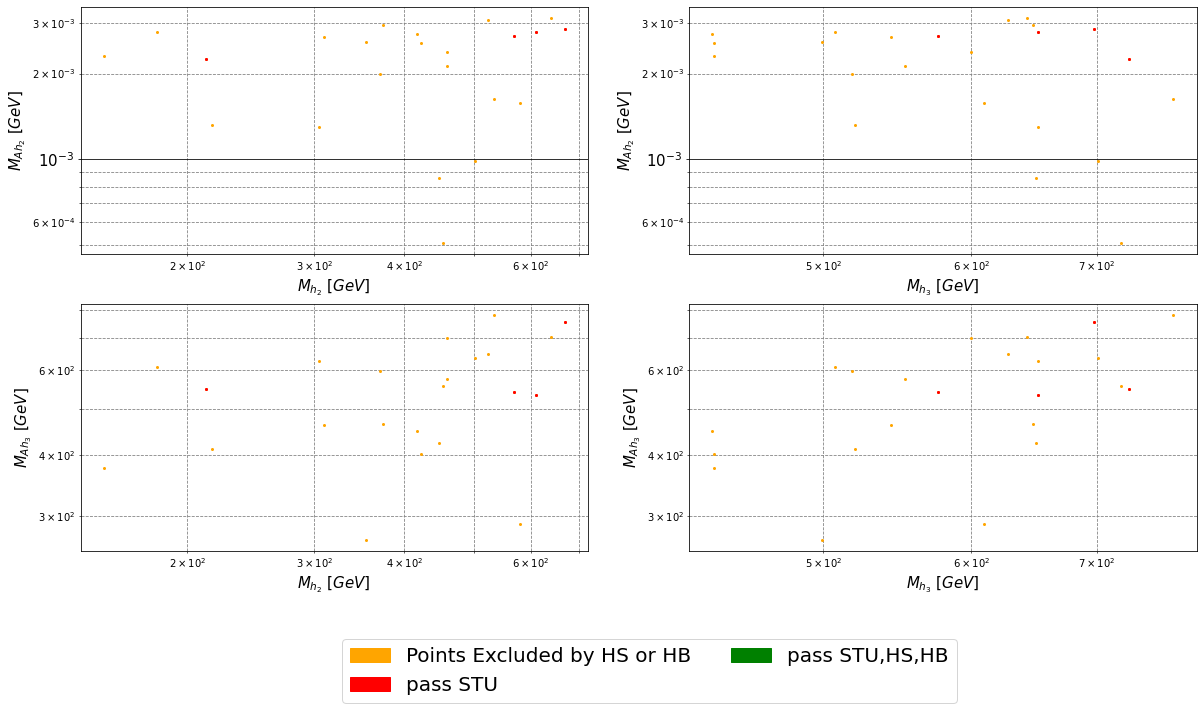

In [41]:
fig = plt.figure(figsize=(20,10))
# Adds subplot on position 1
ax1,ax2,ax3,ax4 = fig.add_subplot(221),fig.add_subplot(222),fig.add_subplot(223),fig.add_subplot(224)

df.plot(kind='scatter',x="Mhh2", y="MAh2",color=color1 ,s=ss,label=r'Points Excluded by HS or HB',ax=ax1,legend=False);
df_ps1.plot(kind='scatter',x="Mhh2", y="MAh2", color=color2,s=ss,label="pass EWPT", ax=ax1,legend=False);
df_ps1ps2ps3.plot(kind='scatter',x="Mhh2", y="MAh2",color=color3,s=ss,label="pass EWPT,HS,HB", ax=ax1,legend=False);

df.plot(kind='scatter',x="Mhh3", y="MAh2",color=color1 ,s=ss,label=r'Points Excluded by HS or HB',ax=ax2,legend=False);
df_ps1.plot(kind='scatter',x="Mhh3", y="MAh2", color=color2,s=ss,label="pass EWPT", ax=ax2,legend=False);
df_ps1ps2ps3.plot(kind='scatter',x="Mhh3", y="MAh2",color=color3,s=ss,label="pass EWPT,HS,HB", ax=ax2,legend=False);

df.plot(kind='scatter',x="Mhh2", y="MAh3",color=color1 ,s=ss,label=r'Points Excluded by HS or HB',ax=ax3,legend=False);
df_ps1.plot(kind='scatter',x="Mhh2", y="MAh3", color=color2,s=ss,label="pass EWPT",ax=ax3,legend=False);
df_ps1ps2ps3.plot(kind='scatter',x="Mhh2", y="MAh3",color=color3,s=ss,label="pass EWPT,HS,HB",ax=ax3,legend=False);

df.plot(kind='scatter',x="Mhh3", y="MAh3",color=color1 ,s=ss,label=r'Points Excluded by HS or HB',ax=ax4,legend=False);
df_ps1.plot(kind='scatter',x="Mhh3", y="MAh3", color=color2,s=ss,label="pass EWPT", ax=ax4,legend=False);
df_ps1ps2ps3.plot(kind='scatter',x="Mhh3", y="MAh3",color=color3,s=ss,label="pass EWPT,HS,HB", ax=ax4,legend=False);

ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax4.set_xscale('log')

ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax4.set_yscale('log')

ax1.set_axisbelow(True)
ax1.grid(True,which='major',ls='-',c='black')
ax1.grid(True,which='minor',ls='--',c='grey')

ax2.set_axisbelow(True)
ax2.grid(True,which='major',ls='-',c='black')
ax2.grid(True,which='minor',ls='--',c='grey')

ax3.set_axisbelow(True)
ax3.grid(True,which='major',ls='-',c='black')
ax3.grid(True,which='minor',ls='--',c='grey')

ax4.set_axisbelow(True)
ax4.grid(True,which='major',ls='-',c='black')
ax4.grid(True,which='minor',ls='--',c='grey')

#fig.legend(loc='lower center', bbox_to_anchor=(0.52, -0.35),fontsize = 15 )
#ax.set_xlim(120,500)
#ax.set_ylim(120,500)
ax1.set_xlabel(r'$M_{h_{2}}\ [GeV]$', fontsize=15)
ax1.set_ylabel(r'$M_{Ah_{2}}\ [GeV]$', fontsize=15)
ax2.set_xlabel(r'$M_{h_{3}}\ [GeV]$', fontsize=15)
ax2.set_ylabel(r'$M_{Ah_{2}}\ [GeV]$', fontsize=15)
ax3.set_xlabel(r'$M_{h_{2}}\ [GeV]$', fontsize=15)
ax3.set_ylabel(r'$M_{Ah_{3}}\ [GeV]$', fontsize=15)
ax4.set_xlabel(r'$M_{h_{3}}\ [GeV]$', fontsize=15)
ax4.set_ylabel(r'$M_{Ah_{3}}\ [GeV]$', fontsize=15)

ax1.tick_params(labelsize=15) ;
ax2.tick_params(labelsize=15) ;
ax3.tick_params(labelsize=15) ;
ax4.tick_params(labelsize=15) ;

handles, labels = plt.gca().get_legend_handles_labels()

patch = mpatches.Patch(color=color1 ,label=r'Points Excluded by HS or HB')  
patch1 = mpatches.Patch(color=color2,label="pass STU")
patch2= mpatches.Patch(color=color3,label="pass STU,HS,HB")
#line = Line2D([], [],marker= "o", label = 'manual line',color='blue')

handles.extend([patch,patch1,patch2])

fig.legend(loc='lower center', bbox_to_anchor=(0.52, -0.1),fontsize = 20 ,handles=handles,ncol=2)

plt.show();


## New plot

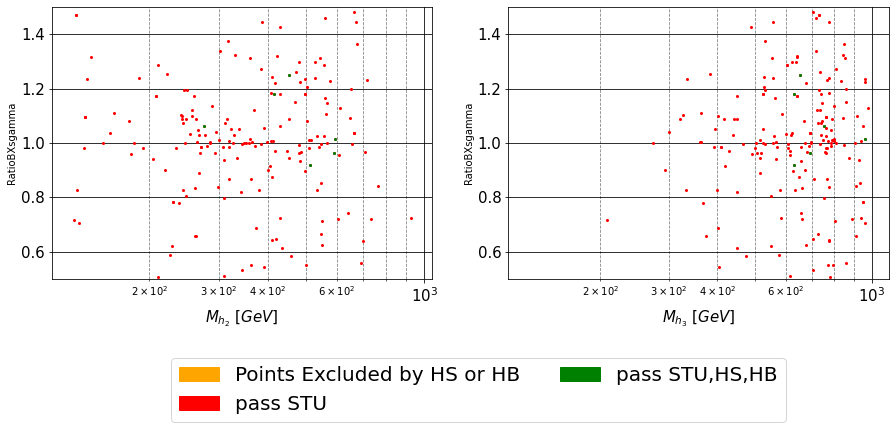

In [59]:
fig = plt.figure(figsize=(15,5))
# Adds subplot on position 1
ax1,ax2 = fig.add_subplot(121),fig.add_subplot(122)

#Ddf.plot(kind='scatter',x="Mhh2", y='RatioBXsgamma',color=color1 ,s=ss,label=r'Points Excluded by HS or HB',ax=ax1,legend=False);
df_ps1.plot(kind='scatter',x="Mhh2", y='RatioBXsgamma', color=color2,s=ss,label="pass EWPT", ax=ax1,legend=False);
df_ps1ps2ps3.plot(kind='scatter',x="Mhh2", y='RatioBXsgamma',color=color3,s=ss,label="pass EWPT,HS,HB", ax=ax1,legend=False);

#Ddf.plot(kind='scatter',x="Mhh3", y='RatioBXsgamma',color=color1 ,s=ss,label=r'Points Excluded by HS or HB',ax=ax2,legend=False);
df_ps1.plot(kind='scatter',x="Mhh3", y='RatioBXsgamma', color=color2,s=ss,label="pass EWPT", ax=ax2,legend=False);
df_ps1ps2ps3.plot(kind='scatter',x="Mhh3", y='RatioBXsgamma',color=color3,s=ss,label="pass EWPT,HS,HB", ax=ax2,legend=False);

ax1.set_xscale('log')
ax2.set_xscale('log')

ax1.set_axisbelow(True)
ax1.grid(True,which='major',ls='-',c='black')
ax1.grid(True,which='minor',ls='--',c='grey')

ax2.set_axisbelow(True)
ax2.grid(True,which='major',ls='-',c='black')
ax2.grid(True,which='minor',ls='--',c='grey')

ax1.set_xlabel(r'$M_{h_{2}}\ [GeV]$', fontsize=15)
#ax1.set_ylabel( r'$ \frac{\textrm{BR} ( B \rightarrow X_s \gamma)}{{BR}_{SM} ( B \rightarrow X_s \gamma )}$', fontsize=15)
ax2.set_xlabel(r'$M_{h_{3}}\ [GeV]$', fontsize=15)
#ax2.set_ylabel( r'$ \frac{\textrm{BR} ( B \rightarrow X_s \gamma)}{{BR}_{SM} ( B \rightarrow X_s \gamma )}$', fontsize=15)

ax1.set_ylim(0.5,1.5)
ax2.set_ylim(0.5,1.5)

ax1.tick_params(labelsize=15) ;
ax2.tick_params(labelsize=15) ;
ax3.tick_params(labelsize=15) ;
ax4.tick_params(labelsize=15) ;

handles, labels = plt.gca().get_legend_handles_labels()

patch = mpatches.Patch(color=color1 ,label=r'Points Excluded by HS or HB')  
patch1 = mpatches.Patch(color=color2,label="pass STU")
patch2= mpatches.Patch(color=color3,label="pass STU,HS,HB")
#line = Line2D([], [],marker= "o", label = 'manual line',color='blue')

handles.extend([patch,patch1,patch2])

fig.legend(loc='lower center', bbox_to_anchor=(0.52, -0.3),fontsize = 20 ,handles=handles,ncol=2)

plt.show();

In [58]:
EWdf[EWdf['RatioB0mumu']<= 2]['RatioB0mumu']

1398    1.274177
Name: RatioB0mumu, dtype: float64

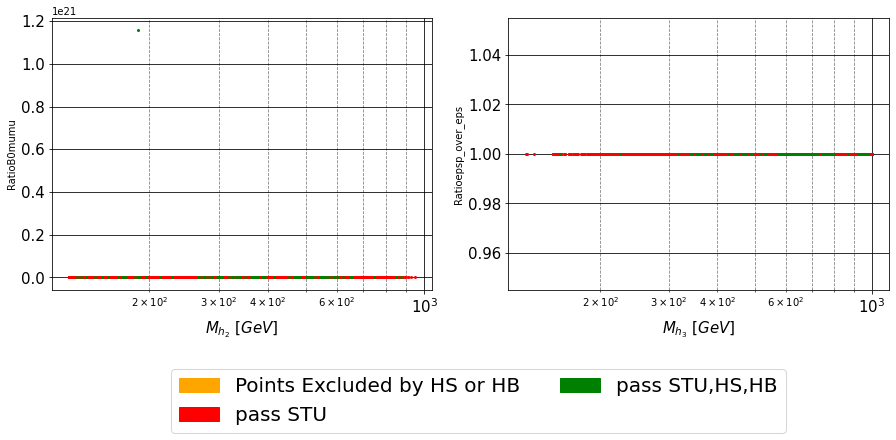

In [60]:
fig = plt.figure(figsize=(15,5))
# Adds subplot on position 1
ax1,ax2 = fig.add_subplot(121),fig.add_subplot(122)

#Ddf.plot(kind='scatter',x="Mhh2", y='RatioBXsgamma',color=color1 ,s=ss,label=r'Points Excluded by HS or HB',ax=ax1,legend=False);
EWdf.plot(kind='scatter',x="Mhh2", y='Ratioepsp_over_eps', color=color2,s=ss,label="pass EWPT", ax=ax1,legend=False);
EWpHBpHSdf.plot(kind='scatter',x="Mhh2", y='RatioB0mumu',color=color3,s=ss,label="pass EWPT,HS,HB", ax=ax1,legend=False);

#Ddf.plot(kind='scatter',x="Mhh3", y='RatioBXsgamma',color=color1 ,s=ss,label=r'Points Excluded by HS or HB',ax=ax2,legend=False);
EWdf.plot(kind='scatter',x="Mhh3", y='Ratioepsp_over_eps', color=color2,s=ss,label="pass STU", ax=ax2,legend=False);
EWpHBpHSdf.plot(kind='scatter',x="Mhh3", y='Ratioepsp_over_eps',color=color3,s=ss,label="pass STU,HS,HB", ax=ax2,legend=False);

ax1.set_xscale('log')
ax2.set_xscale('log')

ax1.set_axisbelow(True)
ax1.grid(True,which='major',ls='-',c='black')
ax1.grid(True,which='minor',ls='--',c='grey')

ax2.set_axisbelow(True)
ax2.grid(True,which='major',ls='-',c='black')
ax2.grid(True,which='minor',ls='--',c='grey')

ax1.set_xlabel(r'$M_{h_{2}}\ [GeV]$', fontsize=15)
#ax1.set_ylabel( r'$ \frac{\textrm{BR} ( B \rightarrow X_s \gamma)}{{BR}_{SM} ( B \rightarrow X_s \gamma )}$', fontsize=15)
ax2.set_xlabel(r'$M_{h_{3}}\ [GeV]$', fontsize=15)
#ax2.set_ylabel( r'$ \frac{\textrm{BR} ( B \rightarrow X_s \gamma)}{{BR}_{SM} ( B \rightarrow X_s \gamma )}$', fontsize=15)

#ax1.set_ylim(0,2)
#ax2.set_ylim(0,2)

ax1.tick_params(labelsize=15) ;
ax2.tick_params(labelsize=15) ;
ax3.tick_params(labelsize=15) ;
ax4.tick_params(labelsize=15) ;

handles, labels = plt.gca().get_legend_handles_labels()

patch = mpatches.Patch(color=color1 ,label=r'Points Excluded by HS or HB')  
patch1 = mpatches.Patch(color=color2,label="pass STU")
patch2= mpatches.Patch(color=color3,label="pass STU,HS,HB")
#line = Line2D([], [],marker= "o", label = 'manual line',color='blue')

handles.extend([patch,patch1,patch2])

fig.legend(loc='lower center', bbox_to_anchor=(0.52, -0.3),fontsize = 20 ,handles=handles,ncol=2)

plt.show();

In [ ]:
yval = columns3[6]
fig = plt.figure(figsize=(15,5))
# Adds subplot on position 1
ax1,ax2 = fig.add_subplot(121),fig.add_subplot(122)

#Ddf.plot(kind='scatter',x="Mhh2", y='RatioBXsgamma',color=color1 ,s=ss,label=r'Points Excluded by HS or HB',ax=ax1,legend=False);
EWdf.plot(kind='scatter',x="Mhh2", y=yval , color=color2,s=ss,label="pass EWPT", ax=ax1,legend=False);
EWpHBpHSdf.plot(kind='scatter',x="Mhh2", y=yval,color=color3,s=ss,label="pass EWPT,HS,HB", ax=ax1,legend=False);

#Ddf.plot(kind='scatter',x="Mhh3", y='RatioBXsgamma',color=color1 ,s=ss,label=r'Points Excluded by HS or HB',ax=ax2,legend=False);
EWdf.plot(kind='scatter',x="Mhh3", y=yval, color=color2,s=ss,label="pass EWPT", ax=ax2,legend=False);
EWpHBpHSdf.plot(kind='scatter',x="Mhh3", y=yval,color=color3,s=ss,label="pass EWPT,HS,HB", ax=ax2,legend=False);

ax1.set_xscale('log')
ax2.set_xscale('log')

ax1.set_axisbelow(True)
ax1.grid(True,which='major',ls='-',c='black')
ax1.grid(True,which='minor',ls='--',c='grey')

ax2.set_axisbelow(True)
ax2.grid(True,which='major',ls='-',c='black')
ax2.grid(True,which='minor',ls='--',c='grey')

ax1.set_xlabel(r'$M_{h_{2}}\ [GeV]$', fontsize=15)
#ax1.set_ylabel( r'$ \frac{\textrm{BR} ( B \rightarrow X_s \gamma)}{{BR}_{SM} ( B \rightarrow X_s \gamma )}$', fontsize=15)
ax2.set_xlabel(r'$M_{h_{3}}\ [GeV]$', fontsize=15)
#ax2.set_ylabel( r'$ \frac{\textrm{BR} ( B \rightarrow X_s \gamma)}{{BR}_{SM} ( B \rightarrow X_s \gamma )}$', fontsize=15)

ax1.set_ylim(0,2)
ax2.set_ylim(0,2)

ax1.tick_params(labelsize=15) ;
ax2.tick_params(labelsize=15) ;
ax3.tick_params(labelsize=15) ;
ax4.tick_params(labelsize=15) ;

handles, labels = plt.gca().get_legend_handles_labels()

patch = mpatches.Patch(color=color1 ,label=r'Points Excluded by HS or HB')  
patch1 = mpatches.Patch(color=color2,label="pass STU")
patch2= mpatches.Patch(color=color3,label="pass STU,HS,HB")
#line = Line2D([], [],marker= "o", label = 'manual line',color='blue')

handles.extend([patch,patch1,patch2])

fig.legend(loc='lower center', bbox_to_anchor=(0.52, -0.3),fontsize = 20 ,handles=handles,ncol=2)

plt.show();

In [ ]:
0.8 + 0.8**3/3 + 0.8 + 0.8**3/3

In [ ]:

ax = Ddf.plot(kind='scatter',x="MAh2", y="MAh3",color=color1 ,s=ss,label=r'Points Excluded by HS or HB',figsize=(10, 7));
EWdf.plot(kind='scatter',x="MAh2", y="MAh3", color=color2,s=ss,label="pass EWPT",figsize=(10, 7), ax=ax);
EWpHBpHSdf.plot(kind='scatter',x="MAh2", y="MAh3",color=color3,s=ss,label="pass EWPT,HS,HB",figsize=(10, 7), ax=ax);
ax.set_yscale('log')
#ax.set_xscale('log')

ax.set_axisbelow(True)

ax.grid(True,which='major',ls='-',c='black')
ax.grid(True,which='minor',ls='--',c='grey')
#ax.set_ylim(90,500)
ax.set_xlabel(r'$M_{Ah_{2}} [GeV]$', fontsize=15)
ax.set_ylabel(r'$M_{Ah_{3}} [GeV]$', fontsize=15)
ax.tick_params(labelsize=15) ;
ax.legend(loc='lower center', bbox_to_anchor=(0.52, -0.35),fontsize = 15 )
plt.show();
#ax = Ddf.plot.scatter(x="Mhh2", y="Mhh3", color=color1,s=ss ,label="fail EWPT",logx=True,logy= True);
#ax.grid(True,which='major',ls='-',c='black')
#ax.grid(True,which='minor',ls='--',c='grey')

In [ ]:

ax = Ddf.plot(kind='scatter',x="Mhh2", y="MAh3",color=color1 ,s=ss,label=r'Points Excluded by HS or HB',figsize=(10, 7));
EWdf.plot(kind='scatter',x="Mhh2", y="MAh3", color=color2,s=ss,label="pass EWPT",figsize=(10, 7), ax=ax);
EWpHBpHSdf.plot(kind='scatter',x="Mhh2", y="MAh3",color=color3,s=ss,label="pass EWPT,HS,HB",figsize=(10, 7), ax=ax);
ax.set_yscale('log')
ax.set_xscale('log')

ax.set_axisbelow(True)
ax.set_title(r'$M_{Ah_{2}} vs M_{Ah_{3}}$', fontsize=16)
ax.grid(True,which='major',ls='-',c='black')
ax.grid(True,which='minor',ls='--',c='grey')
#ax.set_ylim(70,500)
ax.set_xlabel(r'$M_{Ah_{2}} [GeV]$', fontsize=15)
ax.set_ylabel(r'$M_{Ah_{3}} [GeV]$', fontsize=15)
ax.tick_params(labelsize=15) ;
ax.legend(loc='lower center', bbox_to_anchor=(0.52, -0.4),fontsize = 15 )
plt.show();
#ax = Ddf.plot.scatter(x="Mhh2", y="Mhh3", color=color1,s=ss ,label="fail EWPT",logx=True,logy= True);
#ax.grid(True,which='major',ls='-',c='black')
#ax.grid(True,which='minor',ls='--',c='grey')

In [ ]:
ax = Ddf.plot.scatter(x="Mhh2", y="Mhh3", color=color1,s=ss ,label="fail EWPT",logx=True,logy= True)
EWdf.plot.scatter(x="Mhh2", y="Mhh3", color=color2,s=ss,label="pass EWPT",logx=True,logy= True, ax=ax);
EWpHBpHSdf.plot.scatter(x="Mhh2", y="Mhh3",color=color3,s=ss,label="pass EWPT,HS,HB",logx=True,logy= True, ax=ax);

In [ ]:
ax = Ddf.plot.scatter(x="Mhh2", y="MAh2", color=color1,s=ss ,label="fail EWPT",logx=True,logy= True)
EWdf.plot.scatter(x="Mhh2", y="MAh2", color=color2,s=ss,label="pass EWPT",logx=True,logy= True, ax=ax);
EWpHBpHSdf.plot.scatter(x="Mhh2", y="MAh2",color=color3,s=ss,label="pass EWPT,HS,HB",logx=True,logy= True, ax=ax);

In [ ]:
ax = Ddf.plot.scatter(x="Mhh2", y="MAh3", color=color1,s=ss ,label="fail EWPT",logx=True,logy= True)
EWdf.plot.scatter(x="Mhh2", y="MAh3", color=color2,s=ss,label="pass EWPT",logx=True,logy= True, ax=ax);
EWpHBpHSdf.plot.scatter(x="Mhh2", y="MAh3",color=color3,s=ss,label="pass EWPT,HS,HB",logx=True,logy= True, ax=ax);

In [ ]:
ax = Ddf.plot.scatter(x="Mhh2", y="MHm2", color=color1,s=ss ,label="fail EWPT",logx=True,logy= True)
EWdf.plot.scatter(x="Mhh2", y="MHm2", color=color2,s=ss,label="pass EWPT",logx=True,logy= True, ax=ax);
EWpHBpHSdf.plot.scatter(x="Mhh2", y="MHm2",color=color3,s=ss,label="pass EWPT,HS,HB",logx=True,logy= True, ax=ax);

In [ ]:
ax = Ddf.plot.scatter(x="Mhh3", y="MAh2", color=color1,s=ss ,label="fail EWPT",logx=True,logy= True)
EWdf.plot.scatter(x="Mhh3", y="MAh2", color=color2,s=ss,label="pass EWPT",logx=True,logy= True, ax=ax);
EWpHBpHSdf.plot.scatter(x="Mhh3", y="MAh2",color=color3,s=ss,label="pass EWPT,HS,HB",logx=True,logy= True, ax=ax);

In [ ]:
ax = Ddf.plot.scatter(x="Mhh3", y="MAh3", color=color1,s=ss ,label="fail EWPT")
EWdf.plot.scatter(x="Mhh3", y="MAh3", color=color2,s=ss,label="pass EWPT", ax=ax);
EWpHBpHSdf.plot.scatter(x="Mhh3", y="MAh3",color=color3,s=ss,label="pass EWPT,HS,HB", ax=ax);

In [ ]:
ax = Ddf.plot.scatter(x="Mhh3", y="MHm2", color=color1,s=ss ,label="fail EWPT")
EWdf.plot.scatter(x="Mhh3", y="MHm2", color=color2,s=ss,label="pass EWPT", ax=ax);
EWpHBpHSdf.plot.scatter(x="Mhh3", y="MHm2",color=color3,s=ss,label="pass EWPT,HS,HB", ax=ax);

In [ ]:
ax = Ddf.plot.scatter(x="MAh2", y="MAh3", color=color1,s=ss ,label="fail EWPT")
EWdf.plot.scatter(x="MAh2", y="MAh3", color=color2,s=ss ,label="pass EWPT", ax=ax);
EWpHBpHSdf.plot.scatter(x="MAh2", y="MAh3", color=color3,s=ss ,label="pass EWPT,HS,HB", ax=ax);



In [ ]:
ax = Ddf.plot.scatter(x="MAh2", y="MHm2",color=color1,s=ss  ,label="fail EWPT")
EWdf.plot.scatter(x="MAh2", y="MHm2",color=color2,s=ss ,label="pass EWPT", ax=ax);
EWpHBpHSdf.plot.scatter(x="MAh2", y="MHm2",color=color3,s=ss,label="pass EWPT,HS,HB", ax=ax);




In [ ]:
ax = Ddf.plot.scatter(x="MAh3", y="MHm2", color=color1,s=ss ,label="fail EWPT")
EWdf.plot.scatter(x="MAh3", y="MHm2",color=color2,s=ss ,label="pass EWPT", ax=ax);
EWpHBpHSdf.plot.scatter(x="MAh3", y="MHm2",color=color3,s=ss ,label="pass EWPT,HS,HB", ax=ax);

In [ ]:
ax = Ddf.plot.scatter(x='T_parameter', y='S_parameter', color=color1,s=ss ,label="fail EWPT")
EWdf.plot.scatter(x='T_parameter', y='S_parameter',color=color2,s=ss ,label="pass EWPT", ax=ax);
EWpHBpHSdf.plot.scatter(x='T_parameter', y='S_parameter',color=color3,s=ss ,label="pass EWPT,HS,HB", ax=ax);

In [ ]:
ax = Ddf.plot.scatter(x='VS', y='V1', color=color1,s=ss ,label="fail EWPT")
EWdf.plot.scatter(x='VS', y='V1',color=color2,s=ss ,label="pass EWPT", ax=ax);
EWpHBpHSdf.plot.scatter(x='VS', y='V1',color=color3,s=10 ,label="pass EWPT,HS,HB", ax=ax);
ax.legend(loc='lower center', bbox_to_anchor=(0.52, -0.6),fontsize = 15 );

In [ ]:
ax = Ddf.plot.scatter(x='VS', y='V2', color=color1,s=ss ,label="fail STU")
EWdf.plot.scatter(x='VS', y='V2',color=color2,s=ss ,label="pass STU", ax=ax);
EWpHBpHSdf.plot.scatter(x='VS', y='V2',color=color3,s=ss ,label="pass STU,HS,HB", ax=ax);
ax.legend(loc='lower center', bbox_to_anchor=(0.52, -0.6),fontsize = 15 )

In [ ]:
ax = EWdf.plot.scatter(x='beta', y='delta',color=color2,s=ss ,label="pass EWPT");
EWpHBpHSdf.plot.scatter(x='beta', y='delta',color=color3,s=ss ,label="pass EWPT,HS,HB", ax=ax);
ax.legend(loc='lower center', bbox_to_anchor=(0.52, -0.6),fontsize = 15 );

In [ ]:
EWdf[['Lambda1','Lambda2','Lambda3','Lambda4']].plot.box();
EWpHBpHSdf[['Lambda1','Lambda2','Lambda3','Lambda4']].plot.box();

In [ ]:
print('total points: {}\npoints pass EWPT,HB,HS: {}\n \
{}%'.format(EWdf.shape[0] + Ddf.shape[0],EWpHBpHSdf.shape[0],(EWpHBpHSdf.shape[0]/(EWdf.shape[0] + Ddf.shape[0]))*100 ))